In [2]:
# #RANDOM SAMPLING FOR W SWEEP
# from scipy.stats import qmc
# import pandas as pd

# #No control sampling
# sampler = qmc.LatinHypercube(d=2)
# sample = sampler.random(n=500)
# l_bounds = [10E-7, 10E-7]
# u_bounds = [10E-3, 10E-3]
# sample_scaled = qmc.scale(sample, l_bounds, u_bounds)
# nc_lhc = pd.DataFrame({'k_ino1':sample_scaled[:,0], 'theta_ino1':1., 'k_miox':sample_scaled[:,1], 'theta_miox':1.})
# nc_lhc.to_csv('exp_data/nc_lhc.csv')

# #Upstream repression sampling
# sampler = qmc.LatinHypercube(d=3)
# sample = sampler.random(n=500)
# l_bounds = [10E-7, 10E-7, 10E-7]
# u_bounds = [10E-3, 10, 10E-3]
# sample_scaled = qmc.scale(sample, l_bounds, u_bounds)
# ur_lhc = pd.DataFrame({'k_ino1':sample_scaled[:,0], 'theta_ino1':sample_scaled[:,1], 'k_miox':sample_scaled[:,2], 'theta_miox':1.})
# ur_lhc.to_csv('exp_data/ur_lhc.csv')

# #Downstream activation sampling
# sampler = qmc.LatinHypercube(d=3)
# sample = sampler.random(n=500)
# l_bounds = [10E-7, 10E-7, 10E-7]
# u_bounds = [10E-3, 10E-3, 10]
# sample_scaled = qmc.scale(sample, l_bounds, u_bounds)
# da_lhc = pd.DataFrame({'k_ino1':sample_scaled[:,0], 'theta_ino1':1., 'k_miox':sample_scaled[:,1], 'theta_miox':sample_scaled[:,2]})
# da_lhc.to_csv('exp_data/da_lhc.csv')

# #Dual control sampling
# sampler = qmc.LatinHypercube(d=4)
# sample = sampler.random(n=500)
# l_bounds = [10E-7, 10E-7, 10E-7, 10E-7]
# u_bounds = [10E-3, 10, 10E-3, 10]
# sample_scaled = qmc.scale(sample, l_bounds, u_bounds)
# dc_lhc = pd.DataFrame({'k_ino1':sample_scaled[:,0], 'theta_ino1':sample_scaled[:,1], 'k_miox':sample_scaled[:,2], 'theta_miox':sample_scaled[:,3]})
# dc_lhc.to_csv('exp_data/dc_lhc.csv')

In [1]:
from cobra.io import read_sbml_model
from cobra import Reaction

In [ ]:
model = read_sbml_model("../models/iML1515.xml")
training_data = pd.DataFrame()
gc ="EX_gal_e"
medium = model.medium
medium["EX_glc__D_e"] = 0.0
medium[gc] = 10.0
model.medium = medium
solution = model.optimize()

In [2]:
###PYTHON NOTEBOOK FOR VISUALIZATION OF FIGURES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score
from scipy.stats import linregress
import colormaps as cmaps
from scipy.spatial import ConvexHull


### Sample Run

In [82]:
fba_data = pd.read_csv("F:/burden/glucaric_acid/nc/fba_data_nc.csv")
ode_data = pd.read_csv("F:/burden/glucaric_acid/nc/ode_data_nc.csv")
sum_data = pd.read_csv("F:/burden/glucaric_acid/nc/sum_data_nc.csv")
print('N = ', len(sum_data))

N =  500


In [163]:
w = ode_data.W.unique()[15] #30, 15
fba = fba_data.loc[fba_data.W == w]
ode = ode_data.loc[ode_data.W == w]

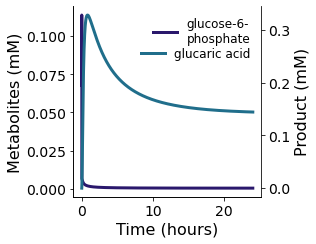

In [181]:
###FIGURE: Sample Bcar results
palette = cmaps.haline.discrete(4).colors

linewidth = 3
axislabelsize=16
axistickssize=14
legendsize=12
fig, axs = plt.subplots(1, 1, figsize=(4.5, 3.5))
# #Growth rate 
# ax = axs[0]
# ax.plot(fba.time, fba.lam, lw=linewidth, color="black")
# ax.set_xlabel('Time (hours)', fontsize=axislabelsize)
# ax.set_ylabel('Growth rate (mM/hr)', fontsize=axislabelsize)
# ax.tick_params(axis='y', labelsize=axistickssize)
# ax.tick_params(axis='x', labelsize=axistickssize)
# for axis in ['top','right']:
#     ax.spines[axis].set_linewidth(0)

#Precursors
ax = axs
ax.plot(ode.time, ode.g6p, lw=linewidth, color=palette[0], label='glucose-6-\nphosphate')

ax2 = ax.twinx()
ax2.plot(ode.time, ode.mi, lw=linewidth, color=palette[1], label=r'glucaric acid')
ax2.set_ylabel('Product (mM)', fontsize=axislabelsize)

ax.set_xlabel('Time (hours)', fontsize=axislabelsize)
ax.set_ylabel('Metabolites (mM)', fontsize=axislabelsize)
ax.tick_params(axis='y', labelsize=axistickssize)
ax.tick_params(axis='x', labelsize=axistickssize)
for axis in ['top']:
    ax.spines[axis].set_linewidth(0)
ax.legend(fontsize=legendsize, frameon=False, bbox_to_anchor=(1.0, 1.0))
ax2.tick_params(axis='y', labelsize=axistickssize)
for axis in ['top','right']:
    ax2.spines[axis].set_linewidth(0)
ax2.legend(fontsize=legendsize, frameon=False, bbox_to_anchor=(1.0, 0.84))
# #Enzymes
# ax = axs[2]
# ax.plot(ode.time, ode.ino1, lw=linewidth, color=palette[3], label='Ino1')
# ax.plot(ode.time, ode.miox, lw=linewidth, color=palette[4], label='MIOX')
# ax.set_xlabel('Time (hours)', fontsize=axislabelsize)
# ax.set_ylabel('Concentration (mM)', fontsize=axislabelsize)
# ax.tick_params(axis='y', labelsize=axistickssize)
# ax.tick_params(axis='x', labelsize=axistickssize)
# ax.legend(fontsize=legendsize, loc='upper right', frameon=False)
# for axis in ['top','right']:
#     ax.spines[axis].set_linewidth(0)

fig.tight_layout()
#fig.savefig("../figs/ga_samplesim_metabolites.png", dpi=300)

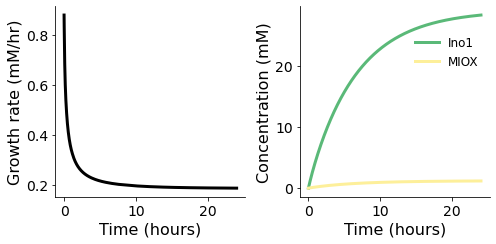

In [165]:
###FIGURE: Sample Bcar results
palette = cmaps.haline.discrete(4).colors

linewidth = 3
axislabelsize=16
axistickssize=14
legendsize=12
fig, axs = plt.subplots(1, 2, figsize=(7, 3.5))
#Growth rate 
ax = axs[0]
ax.plot(fba.time, fba.lam, lw=linewidth, color="black")
ax.set_xlabel('Time (hours)', fontsize=axislabelsize)
ax.set_ylabel('Growth rate (mM/hr)', fontsize=axislabelsize)
ax.tick_params(axis='y', labelsize=axistickssize)
ax.tick_params(axis='x', labelsize=axistickssize)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)


#Enzymes
ax = axs[1]
ax.plot(ode.time, ode.ino1, lw=linewidth, color=palette[2], label='Ino1')
ax.plot(ode.time, ode.miox, lw=linewidth, color=palette[3], label='MIOX')
ax.set_xlabel('Time (hours)', fontsize=axislabelsize)
ax.set_ylabel('Concentration (mM)', fontsize=axislabelsize)
ax.tick_params(axis='y', labelsize=axistickssize)
ax.tick_params(axis='x', labelsize=axistickssize)
ax.legend(fontsize=legendsize, loc='upper right', frameon=False, bbox_to_anchor=(1.0, 0.9))
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)

fig.tight_layout()
fig.savefig("../figs/ga_samplesim_enzymes.png", dpi=300)

### Medium conditions

In [55]:
#Read in GC data
growth_conditions_names = ["galactose", "gluconate", "xylose", "lalanine", "lactate", "pyruvate", "ribose", "glucose", "fructose", "sorbitol", "mannitol", "na-glucosamine", "glycerol", "succinate", "acetate"]

wt = pd.DataFrame()
for g in growth_conditions_names:
    ode_data = pd.read_csv("F:/medium_conditions/"+g+"_ode_data.csv")
    fba_data = pd.read_csv("F:/medium_conditions/"+g+"_fba_data.csv")
    wt = pd.concat([wt, pd.DataFrame({"gc": [g], "p_auc": [np.sum(ode_data.mi)], "p_final": [list(ode_data.mi)[-1]], "lam_final": [list(fba_data.lam)[-1]]})])  


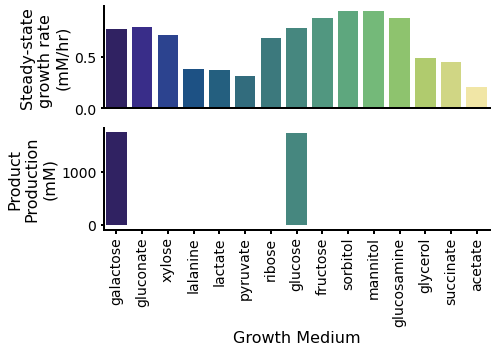

In [97]:
###FIGURE: Growth conditions experiment
gcn = ["galactose", "gluconate", "xylose", "lalanine", "lactate", "pyruvate", "ribose", "glucose", "fructose", "sorbitol", "mannitol", "glucosamine", "glycerol", "succinate", "acetate"]

palette = cmaps.haline.discrete(15).colors
linewidth = 3
axislabelsize=16
axistickssize=14
legendsize=12

fig, axs = plt.subplots(2, 1,figsize=(7, 5), sharex=True)

#Growth rates
ax = axs[0]
sns.barplot(data=wt, x='gc', y='lam_final', palette=palette, ax=ax)
ax.set_ylabel('Steady-state\ngrowth rate \n(mM/hr)', fontsize=axislabelsize)
ax.set_xlabel('')
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.tick_params(width=2)
ax.tick_params(axis='y', labelsize=axistickssize)
ax.set_xlabel('')
ax.tick_params(axis='x', bottom=False)

#Product production
ax = axs[1]
sns.barplot(data=wt, x='gc', y='p_auc', palette=palette, ax=ax)
ax.set_ylabel('Product\nProduction\n(mM)', fontsize=axislabelsize)
ax.set_xlabel('Growth Medium', fontsize=16)
ax.set_xticklabels(gcn, fontsize=12, rotation=90)

for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.tick_params(width=2)
ax.tick_params(axis='y', labelsize=axistickssize)
ax.tick_params(axis='x', labelsize=axistickssize)
fig.tight_layout()
fig.savefig('../figs/fig2c.png', dpi=500)

### Burden results

In [3]:
sum_da = pd.read_csv('F:/burden/glucaric_acid/da/sum_data_da_burden.csv')
sum_ur = pd.read_csv('F:/burden/glucaric_acid/ur/sum_data_ur_burden.csv')
sum_nc = pd.read_csv('F:/burden/glucaric_acid/nc/sum_data_nc_burden.csv')
sum_dc = pd.read_csv('F:/burden/glucaric_acid/dc/sum_data_dc_burden.csv')

print('DA: ', len(sum_da))
print('UR: ', len(sum_ur))
print('NC: ', len(sum_nc))
print('DC: ', len(sum_dc))

sum_ur['percent_burden'] = [-(1-(0.88-sum_ur.delta_burden[i])/0.88) for i in range(len(sum_ur))]
sum_dc['percent_burden'] = [-(1-(0.88-sum_dc.delta_burden[i])/0.88) for i in range(len(sum_dc))]
sum_nc['percent_burden'] = [-(1-(0.88-sum_nc.delta_burden[i])/0.88) for i in range(len(sum_nc))]
sum_da['percent_burden'] = [-(1-(0.88-sum_da.delta_burden[i])/0.88) for i in range(len(sum_da))]
sum_ur['architecture']= 'Upstream Repression'
sum_dc['architecture']= 'Dual Control'
sum_nc['architecture']= 'Open Loop'
sum_da['architecture']= 'Downstream Activation'

sum_total = pd.concat([sum_ur, sum_dc, sum_nc, sum_da]).reset_index(drop=True)


DA:  475
UR:  500
NC:  407
DC:  499


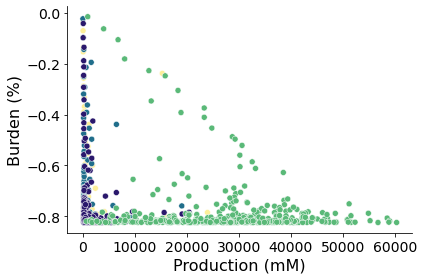

In [424]:
###FIGURE: Burden vs. production, N=400(+)
colors = cmaps.haline.discrete(4).colors
palette = {'Upstream Repression': colors[3], 'Downstream Activation': colors[2], 'Open Loop': colors[0], 'Dual Control': colors[1]}
linewidth = 3
axislabelsize=16
axistickssize=14
legendsize=12

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot()
ax.set_xlabel('Production (mM)', fontsize=axislabelsize)
ax.set_ylabel('Burden (%)', fontsize=axislabelsize)
ax.tick_params(axis='y', labelsize=axistickssize)
ax.tick_params(axis='x', labelsize=axistickssize)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)


# ax.set_xscale('log')
# ax.set_xlim([10E1, 10E4])
# ax.plot(sum_nc.ga_tot, sum_nc.percent_burden, '.', c=palette[0], ms=10)
# ax.plot(sum_dc.ga_tot, sum_dc.percent_burden, '.', c=palette[1], ms=10)
# ax.plot(sum_da.ga_tot, sum_da.percent_burden, '.', c=palette[2], ms=10)
# ax.plot(sum_ur.ga_tot, sum_ur.percent_burden, '.', c=palette[3], ms=10)
#ax.set_xlim([0, 3000])
sns.scatterplot(data=sum_total, x='ga_tot', y='percent_burden', hue='architecture', palette=palette, ax=ax, legend=False)
fig.tight_layout()
fig.savefig('../figs/ga_burden_scatter.png', dpi=500)

(0.0, 5000.0)

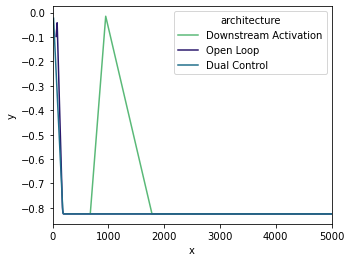

In [423]:
#Optimality curves - doesn't really work
points = np.array(sum_da[['ga_tot', 'percent_burden']])
hull = ConvexHull(points)
optimality = points[hull.vertices]
#plt.plot(optimality[:, 0], optimality[:, 1], 'r.')
d = pd.DataFrame({'x':optimality[:, 0], 'y':optimality[:, 1], 'architecture':'Downstream Activation'})

# points = np.array(sum_ur[['ga_tot', 'percent_burden']])
# hull = ConvexHull(points)
# optimality = points[hull.vertices]
# #plt.plot(optimality[:, 0], optimality[:, 1], 'r.')
# d = pd.concat([d, pd.DataFrame({'x':optimality[:, 0], 'y':optimality[:, 1], 'architecture':'Upstream Repression'})])

points = np.array(sum_nc[['ga_tot', 'percent_burden']])
hull = ConvexHull(points)
optimality = points[hull.vertices]
#plt.plot(optimality[:, 0], optimality[:, 1], 'r.')
d = pd.concat([d, pd.DataFrame({'x':optimality[:, 0], 'y':optimality[:, 1], 'architecture':'Open Loop'})])

points = np.array(sum_dc[['ga_tot', 'percent_burden']])
hull = ConvexHull(points)
optimality = points[hull.vertices]
#plt.plot(optimality[:, 0], optimality[:, 1], 'r.')
d = pd.concat([d, pd.DataFrame({'x':optimality[:, 0], 'y':optimality[:, 1], 'architecture':'Dual Control'})])

d=d.reset_index(drop=True)
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
sns.lineplot(data=d, x='x', y='y', hue='architecture', ax=ax, palette=palette)
ax.set_xlim([0, 5000])
# points = np.array([list(sum_da.ga_tot), list(sum_da.percent_burden)]).reshape((475, 2))
# hull = ConvexHull(points)
# plt.plot(points[hull.vertices,0], points[hull.vertices,1], lw=2)

# points = np.array([list(sum_nc.ga_tot), list(sum_nc.percent_burden)]).reshape((4-7, 2))
# hull = ConvexHull(points)
# plt.plot(points[hull.vertices,0], points[hull.vertices,1], lw=2)

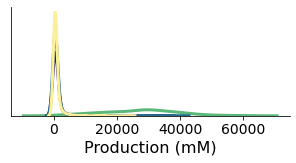

In [425]:
fig, axs = plt.subplots(1, 1, figsize=(5, 2))
#Production histograms
ax = axs
sns.kdeplot(data=sum_total, x='ga_tot', hue='architecture', ax=ax, palette = palette, linewidth=linewidth, legend=False)
ax.set_xlabel('Production (mM)', fontsize=axislabelsize)
ax.set_ylabel('')
ax.set_yticks([])
ax.tick_params(axis='y', labelsize=axistickssize)
ax.tick_params(axis='x', labelsize=axistickssize)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
fig.savefig('../figs/ga_burden_histogram.png', dpi=500)

### Bayesopt Experiments

In [20]:
##Recompute alternate production metric from ODE and get scaling factor (only need to do DA)
ode_da = pd.read_csv('F:/burden/glucaric_acid/da/ode_data_da.csv') #3min
Ws = ode_da.W.unique() #7s

prods=[]
for w in Ws: #17min
    ode = ode_da.loc[ode_da.W == w].reset_index(drop=True)
    ga_ss = np.mean(ode.iloc[len(ode)-10:len(ode)].mi)
    prod = np.sum([(ga_ss-x)**2 for x in list(ode.mi)])
    prods.append(prod)
theta_mioxs = [float(w.strip('[[').strip(']]').split(',')[4].strip(' ]')) for w in Ws]
data = pd.DataFrame({'theta_miox':theta_mioxs, 'production':prods, 'W':Ws})
data.to_csv('F:/burden/glucaric_acid/da/alt_production.csv')

In [4]:
##Recompute alternate production metric from ODE and get scaling factor (only need to do DA)
ode_dc = pd.read_csv('F:/burden/glucaric_acid/dc/ode_data_dc.csv') #3min
Ws = ode_dc.W.unique() #7s

prods=[]
for w in Ws: #17min
    ode = ode_dc.loc[ode_dc.W == w].reset_index(drop=True)
    ga_ss = np.mean(ode.iloc[len(ode)-10:len(ode)].mi)
    prod = np.sum([(ga_ss-x)**2 for x in list(ode.mi)])
    prods.append(prod)
theta_mioxs = [float(w.strip('[[').strip(']]').split(',')[4].strip(' ]')) for w in Ws]
data = pd.DataFrame({'theta_miox':theta_mioxs, 'production':prods, 'W':Ws})
data.to_csv('F:/burden/glucaric_acid/dc/alt_production.csv')

##Recompute alternate production metric from ODE and get scaling factor (only need to do DA)
ode_ur = pd.read_csv('F:/burden/glucaric_acid/ur/ode_data_ur.csv') #3min
Ws = ode_ur.W.unique() #7s

prods=[]
for w in Ws: #17min
    ode = ode_ur.loc[ode_ur.W == w].reset_index(drop=True)
    ga_ss = np.mean(ode.iloc[len(ode)-10:len(ode)].mi)
    prod = np.sum([(ga_ss-x)**2 for x in list(ode.mi)])
    prods.append(prod)
theta_mioxs = [float(w.strip('[[').strip(']]').split(',')[4].strip(' ]')) for w in Ws]
data = pd.DataFrame({'theta_miox':theta_mioxs, 'production':prods, 'W':Ws})
data.to_csv('F:/burden/glucaric_acid/ur/alt_production.csv')

##Recompute alternate production metric from ODE and get scaling factor (only need to do DA)
ode_nc = pd.read_csv('F:/burden/glucaric_acid/nc/ode_data_nc.csv') #3min
Ws = ode_nc.W.unique() #7s

prods=[]
for w in Ws: #17min
    ode = ode_nc.loc[ode_nc.W == w].reset_index(drop=True)
    ga_ss = np.mean(ode.iloc[len(ode)-10:len(ode)].mi)
    prod = np.sum([(ga_ss-x)**2 for x in list(ode.mi)])
    prods.append(prod)
theta_mioxs = [float(w.strip('[[').strip(']]').split(',')[4].strip(' ]')) for w in Ws]
data = pd.DataFrame({'theta_miox':theta_mioxs, 'production':prods, 'W':Ws})
data.to_csv('F:/burden/glucaric_acid/nc/alt_production.csv')

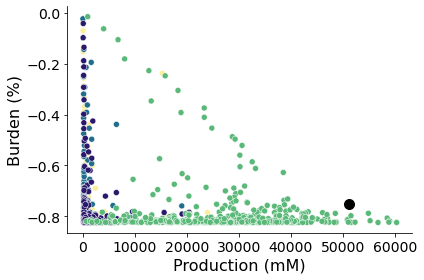

In [15]:
#Compute objective functions with various alphas 
def obj(burden, production, alpha, scaling): return alpha*(-1*burden) + ((1-alpha)*scaling)/production
alphas = [0.75]
s = max(sum_total.ga_tot)
for a in alphas:
    sum_total[str(a)] = obj(sum_total.percent_burden, sum_total.ga_tot, a, s)

colors = cmaps.haline.discrete(4).colors
palette = {'Upstream Repression': colors[3], 'Downstream Activation': colors[2], 'Open Loop': colors[0], 'Dual Control': colors[1]}
linewidth = 3
axislabelsize=16
axistickssize=14
legendsize=12

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot()
# ax.set_xlim([0, 100])
# ax.set_ylim([-0.2, 0.])
ax.set_xlabel('Production (mM)', fontsize=axislabelsize)
ax.set_ylabel('Burden (%)', fontsize=axislabelsize)
ax.tick_params(axis='y', labelsize=axistickssize)
ax.tick_params(axis='x', labelsize=axistickssize)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
sns.scatterplot(data=sum_total, x='ga_tot', y='percent_burden', hue='architecture', palette=palette, ax=ax, legend=False)
for a in alphas:
    min_obj = sum_total.loc[sum_total[str(a)]== min(sum_total[str(a)])]
    ax.plot(min_obj.ga_tot, min_obj.percent_burden, 'ko', ms=10)
fig.tight_layout()

In [87]:
bo_data = pd.read_csv('F:/bayesopt/bayesopt_test/bo_data_bayesopt_test.csv').reset_index()

best_loss = 1E5
best_circuit = 'Initial'
best_losses = []
best_losses_circuits = []
for i in range(len(bo_data)):
    if bo_data.objective[i] < best_loss:
        best_loss = bo_data.objective[i]
        best_circuit = bo_data.arch[i]
    best_losses.append(best_loss)
    best_losses_circuits.append(best_circuit)
bo_data['best_losses'] = best_losses
bo_data['best_loss_circuit'] = best_losses_circuits


c:\Users\Charlotte\anaconda3\envs\sundials\lib\site-packages\seaborn\_core.py:163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:


<Figure size 1008x607.68 with 0 Axes>

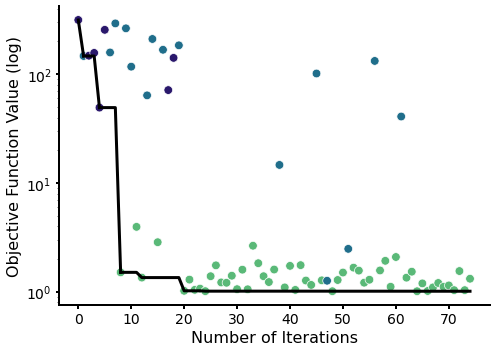

In [96]:

fig = plt.figure(figsize=(7*2, 4.22*2))
palette = cmaps.haline.discrete(4).colors
linewidth = 3
axislabelsize=16
axistickssize=14
legendsize=12

fig, ax = plt.subplots(1, 1, figsize=(7, 5), sharex=True)

ax.set_xlabel('Number of Iterations', fontsize=axislabelsize)
ax.set_ylabel('Objective Function Value (log)', fontsize=axislabelsize)
ax.set_yscale('log')
#ax.set_ylim([10E-2, 10E8])
sns.scatterplot(x='index', y='objective', hue='arch', data=bo_data, ax=ax, palette=palette, legend=False, s=75)

prev_c = 'Initial'
starts = []
archs = [prev_c]
for i in range(len(bo_data)):
    c = bo_data.best_loss_circuit[i]
    if c != prev_c: 
        starts.append(i)
        archs.append(c)
        prev_c = c
starts
stops = starts[1:]
stops.append(len(bo_data))

for start, stop, a in zip(starts, stops, archs[1:]):
    ax.plot(bo_data.index[start:stop+1], bo_data.best_losses[start:stop+1], color='k', linewidth=3)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
ax.tick_params(width=2)

for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.tick_params(axis='y', labelsize=axistickssize)
ax.tick_params(axis='x', labelsize=axistickssize)

fig.tight_layout()
#if save_figs: fig.savefig('../figs/glucaric_acid_sample_run.png', dpi=300)